# AP HW5

## Stochastic Discount Factor

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <span style="color:red">模拟消费增长率的分布</span>
###
> epsilon：从标准正态分布中生成的随机变量，用于模拟消费增长中的常规波动。\
> uniform：从均匀分布中生成的随机变量，用于确定是否出现灾难性事件。\
> nu：若 uniform 值大于 0.983，则表示发生了灾难事件，nu 值为 ln(0.65)，即消费减少35%；否则，nu 值为0。1.7% 的灾难性事件概率模拟低概率、高冲击事件。

> Simulate consumption growth
$$
\ln \tilde{g} = 0.02 + 0.02 \tilde{\epsilon} + \tilde{\nu}
$$
Here $\tilde{\epsilon}$ is a standard normal random variable, while $\tilde{\nu}$ is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

In [3]:
samples = int(1e4)# 生成 10,000 个消费增长样本
epsilon = np.random.normal(0, 1, samples)
uniform = np.random.uniform(0, 1, samples)
nu = np.where(uniform > 0.983, np.log(0.65), 0)

## <span style="color:red">计算消费增长率和定价核</span>
####
> 对数消费增长率 ln(g)\
> 通过取指数得到消费增长率 g\
> 0.02 是平均增长率，0.02 * epsilon 是常规波动，nu 是灾难性事件的影响。

In [4]:
# 计算消费增长率 g
ln_g = 0.02 + 0.02 * epsilon + nu
g = np.exp(ln_g)

> Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:
$$
\tilde{M} = 0.99 \tilde{g}^{-\gamma}
$$
> Calculate the mean (μM) and standard deviation (σM) of pricing kernel for each value of γ, and plot the volatility ratio (σM/μM) on the vertical axis vs γ on the horizontal axis.

In [5]:
# 定义风险厌恶系数 γ 的取值范围，从 1 到 4，以 0.1 为步长。
# γ 代表投资者的风险厌恶程度。不同的 γ 值用于计算不同风险偏好下的定价核。
gamma = np.arange(1, 4.1, 0.1)

## <span style="color:red">计算定价核的均值和标准差</span>
### 计算每个 γ 值下的定价核 M 的均值、标准差和波动率比率
> g^(-γ) 表示在不同风险厌恶系数 γ 下对未来消费增长的贴现。

In [5]:
all_mu_M = []
all_sigma_M = []
all_volatility_ratio = []

for i in gamma:
    M = 0.99 * g ** (-i)# 计算定价核 M    0.99是折现因子
    mu_M = np.mean(M)  # mean of M
    sigma_M = np.std(M)  # sd
    volatility_ratio = sigma_M / mu_M# M 的波动率比率,用于衡量定价核的相对波动性
    

    all_mu_M.append(mu_M)
    all_sigma_M.append(sigma_M)
    all_volatility_ratio.append(volatility_ratio)

# 构建数据框并查找临界 γ 值,都放到同一个dataframe中，方便之后查找
data = pd.DataFrame({
    'gamma': gamma,
    'mu_M': all_mu_M,
    'sigma_M': all_sigma_M,
    'volatility_ratio': all_volatility_ratio
})

data

,gamma,mu_M,sigma_M,volatility_ratio
0,1.0,0.980491,0.073790,0.075258
1,1.1,0.979815,0.082782,0.084487
2,1.2,0.979196,0.092121,0.094079
3,1.3,0.978637,0.101825,0.104047
4,1.4,0.978139,0.111908,0.114409
5,1.5,0.977704,0.122387,0.125178
6,1.6,0.977336,0.133282,0.136372
7,1.7,0.977036,0.144608,0.148007
8,1.8,0.976807,0.156387,0.160100
9,1.9,0.976652,0.168637,0.172668


> Find the smallest value of γ (in your data) for which $ \frac{σM}{μM} > 0.4$. 

In [6]:
# 查找使波动率比率超过 0.4 的最小 γ 值
gamma_above_threshold = gamma[np.array(all_volatility_ratio)> 0.4]

# gamma_above_threshold 是波动率比率超过 0.4 的 γ 值集合
# min_gamma 则是这些值中的最小值，表示达到这一波动率比率的最低风险厌恶程度。
min_gamma = np.min(gamma_above_threshold)
print(f'The smallest gamma for which volatility ratio > 0.4 is: {min_gamma}')

The smallest gamma for which volatility ratio > 0.4 is: 3.300000000000002


## <span style="color:red">可视化波动率比率与 γ 的关系</span>

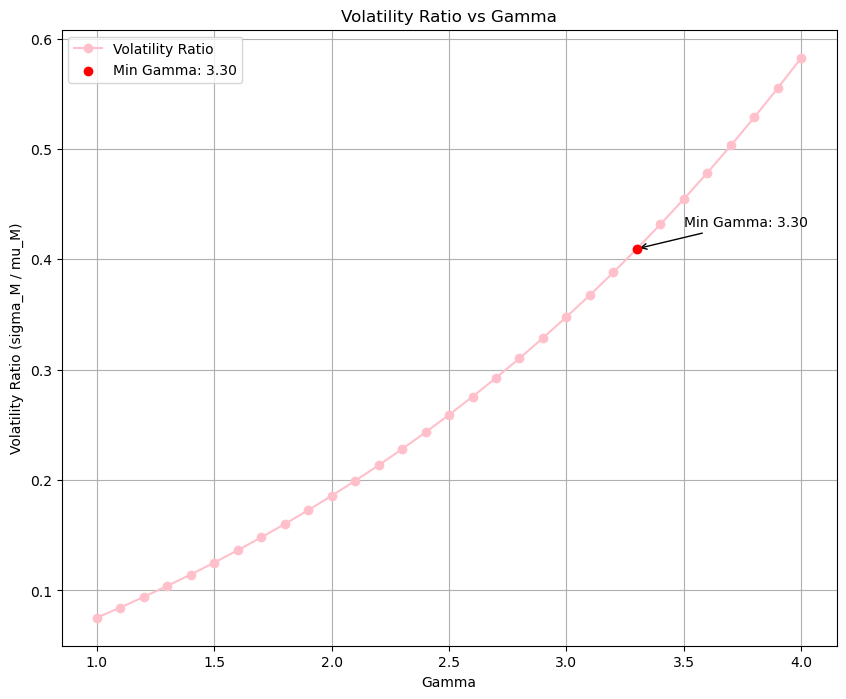

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(gamma, all_volatility_ratio, marker='o', linestyle='-', color='pink', label="Volatility Ratio")

min_volatility_ratio_index = np.where(gamma == min_gamma)[0][0]
min_volatility_ratio = all_volatility_ratio[min_volatility_ratio_index]
plt.scatter(min_gamma, min_volatility_ratio, color='red', zorder=5, label=f"Min Gamma: {min_gamma:.2f}")
plt.annotate(f'Min Gamma: {min_gamma:.2f}', 
             xy=(min_gamma, min_volatility_ratio), 
             xytext=(min_gamma + 0.2, min_volatility_ratio + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Volatility Ratio vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('Volatility Ratio (sigma_M / mu_M)')
plt.grid(True)
plt.legend()
plt.show()

> Explanation

$ \gamma $ represents the investors' sensitivity to risk. From the provided results and the accompanying graph, we observe that the smallest $ \gamma $ is approximately 3.3 when the volatility ratio $ \frac{\sigma_M}{\mu_M} $ surpasses 0.4. Investors with high risk aversion will pay more attention to catastrophic events, which are low probability but high impact.

Investors are more concerned about the effects of rare catastrophic events on the future retrun of their investment when $ \gamma > 3.3 $. Therefore, they require a hiher return rate not only to offset potential losses from these future catastrophic events but also to compensate for the uncertainty and psychological pressure associated with holding risky assets under such conditions.

It means that inverstors will not concerned about the rare catastrophic events too much when $ \gamma < 3.3 $, so they do not consider this kinds of the risk when deciding their investment strategy.As $ \gamma $ increases towards the critical point of 3.3, investors become more conservative in their investment strategies. After this threshold, they take rare disaster risks more seriously and require higher returns to offset the perceived risk.